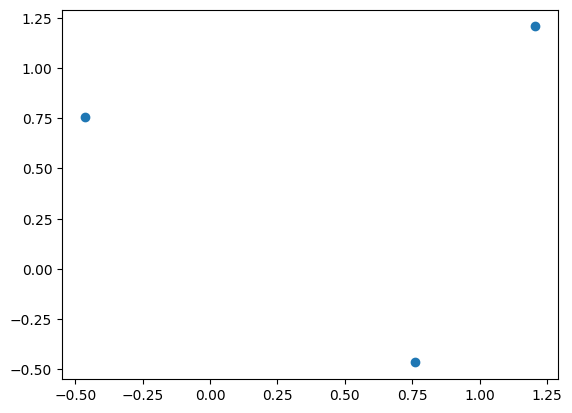

In [24]:
import torch
import math
import random
import matplotlib.pyplot as plt

# seed math and torch
seed = 1
torch.manual_seed(seed)
random.seed(seed)

# 3 vectors in x-z plane separated by 120 degrees
pi = math.pi
features = torch.tensor([
    [math.cos(pi / 4), math.sin(pi / 4)],
    [math.cos(pi / 4 + 2 * pi / 3), math.sin(pi / 4 + 2 * pi / 3)],
    [math.cos(pi / 4 + 4 * pi / 3), math.sin(pi / 4 + 4 * pi / 3)],
])

# 4 vectors in x-z plane separated by 90 degrees
# features = torch.tensor([
#     [math.cos(pi / 4), math.sin(-pi / 4)],
#     [math.cos(pi / 4 + pi / 2), math.sin(pi / 4 + pi / 2)],
#     [math.cos(pi / 4 + pi), math.sin(pi / 4 + pi)],
#     [math.cos(pi / 4 + 2 * pi), math.sin(pi / 4 + 2 * pi)],
# ])
bias = torch.tensor([0.5, 0.5])
features += bias

num_features = features.shape[0]
expansion_factor = 2

plt.scatter(features[:, 0], features[:, 1])

In [25]:
from sae.multi_dim_sae import MultiDimSAE, SAE
from sae.sae_config import SAEConfig, MultiDimSAEConfig

config = SAEConfig(
    input_dim=2,
    latent_dim=expansion_factor*num_features,
    # multi_dim_config=MultiDimSAEConfig(num_multi_dim_features=0),
)

model = SAE(config).train_model(features, num_epochs=1000)


model.plot_losses()

100%|██████████| 1000/1000 [00:00<00:00, 2363.42it/s]


In [26]:
features.shape

torch.Size([3, 2])

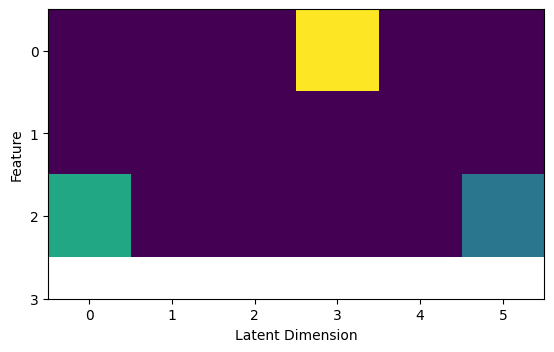

In [27]:
latents = model.encode(features).detach().numpy()

plt.imshow(latents)
plt.xlabel("Latent Dimension")
plt.ylabel("Feature")
plt.yticks([0, 1, 2, 3])
plt.show()

(6, 2)


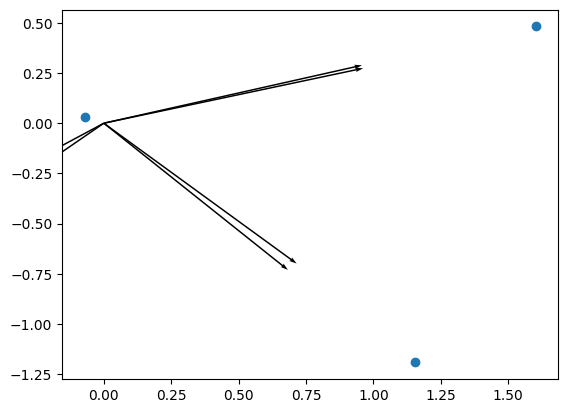

In [36]:
W_d = model.W_dec.detach().numpy()
b_d = model.b_dec.detach().numpy()
print(W_d.shape)

# plot each row of W_d as a vector
for i in range(W_d.shape[0]):
    plt.quiver(0, 0, W_d[i, 0], W_d[i, 1], angles='xy', scale_units='xy', scale=1, width=0.003)
plt.scatter(features[:, 0] - b_d[0], features[:, 1] - b_d[1])
plt.show()